#### **Medical Cost Prediction: Regression Analysis**

**Author: Mahitha**

**Date: 4/19/2025**

**Objective: Evaluate different Linear Regression models using the Medical Insurance Dataset to predict medical insurance costs using selected input variables.**

**Imports**

In the code cell below, import the necessary Python libraries for this notebook.

In [96]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score   
)
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

#### **Section 1. Import and Inspect the Data**

In [54]:
mds1 = pd.read_csv(r'C:\Users\Mahi2\projects\applied-ml-mk\applied-ml-mk\medinsu\medicalinsurance\insurance.csv')
# Display structure and first few rows
mds1.info()

## display summary statistics
mds1.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [55]:
mds1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To check data issues, do a quick data sanity check. see if there are duplicates, missing values, outliers, data types, unique vlaues in categorical columns 

In [56]:
## check for duplicates
mds1.duplicated().sum()



np.int64(1)

In [57]:

## view duplicate rows
mds1[mds1.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [58]:

## remove duplicates
mds1 = mds1.drop_duplicates()

**check for missing values**

In [59]:
mds1.isnull().sum() ### There are no missing values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

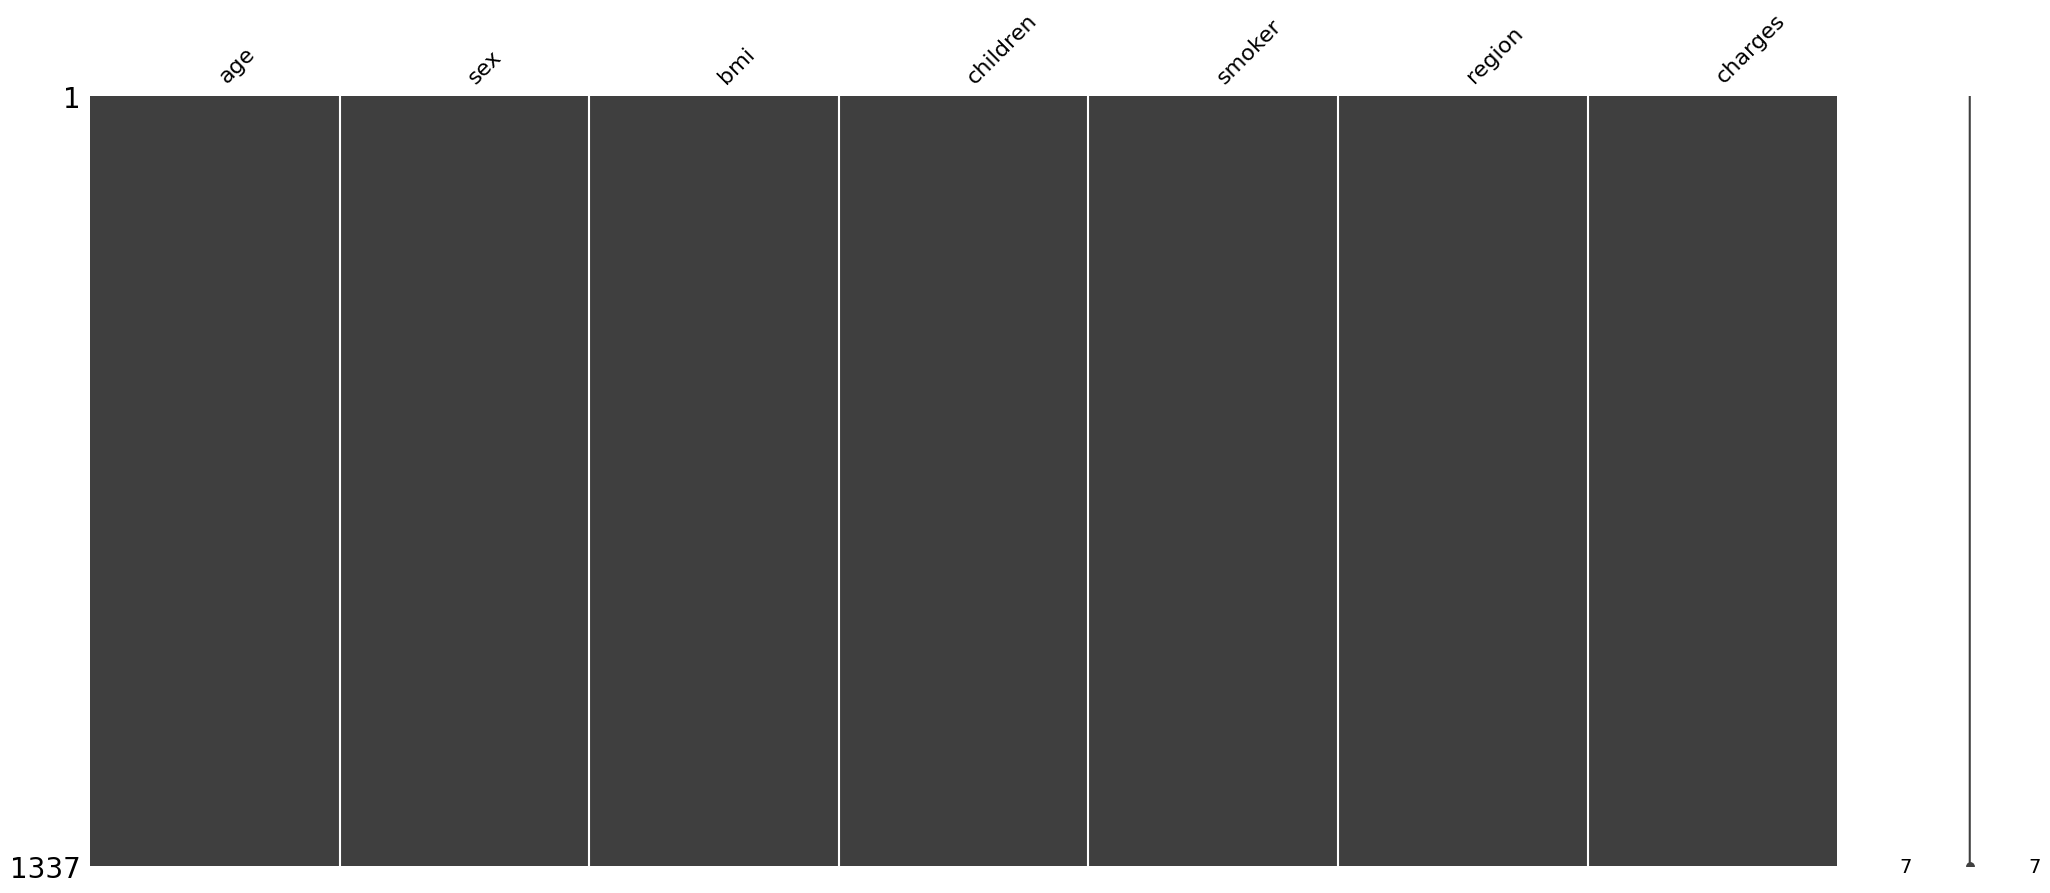

In [60]:
# Install missingno if you haven't already
##!pip install missingno

import missingno as msno

# Visualize missing data
msno.matrix(mds1)

In [61]:
mds1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [62]:
## look for unique values in a categorical columns 

print(mds1['sex'].unique())
print(mds1['smoker'].unique())
print(mds1['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [63]:
##look for outliers

mds1['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

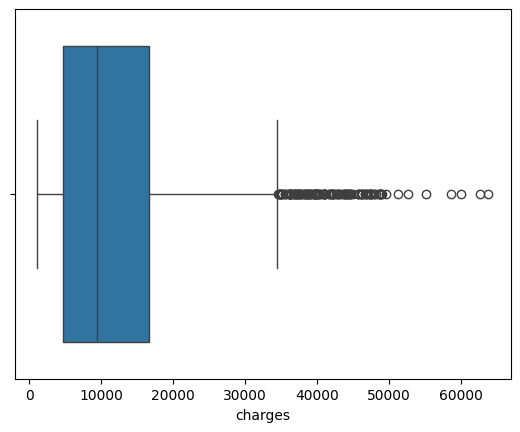

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=mds1, x='charges')
plt.show()

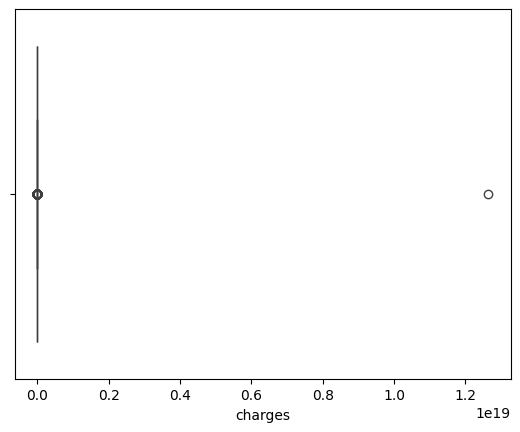

In [65]:
mds2 = pd.read_csv(r'C:\Users\Mahi2\projects\applied-ml-mk\applied-ml-mk\medinsu\medicalinsurance\insurance1.csv')
sns.boxplot(data=mds2, x='charges')
plt.show()

In [69]:
import numpy as np

# Choose the column
col = 'charges'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = mds1[col].quantile(0.25)
Q3 = mds1[col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = mds1[(mds1[col] < lower_bound) | (mds1[col] > upper_bound)]

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print("Outlier values:")
print(outliers[[col]])

Lower bound: -13120.716174999998
Upper bound: 34524.777625
Outlier values:
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]


**Reflection 1: What do you notice about the dataset? Are there any data issues?**

- There are no missing values within the datset.

- There are outliers in charges, and these are common in healthcare costs - vary wildly - especially for smokers. 

- BMI values are unusually high, this might be due to obeisty. 

- There are greater number of yes in smoker which can lead to class imbalance issues in classification models.

- sex, smoker, and region will all need to be encoded for the regression modeling because they are non-numeric.

In [71]:
##Use RobustScaler for charges - scale for modeling
scaler = RobustScaler()
mds1['charges_scaled'] = scaler.fit_transform(mds1[['charges']])

#### **Section 2. Data Exploration and Preparation**
- 2.1 Explore data patterns and distributions

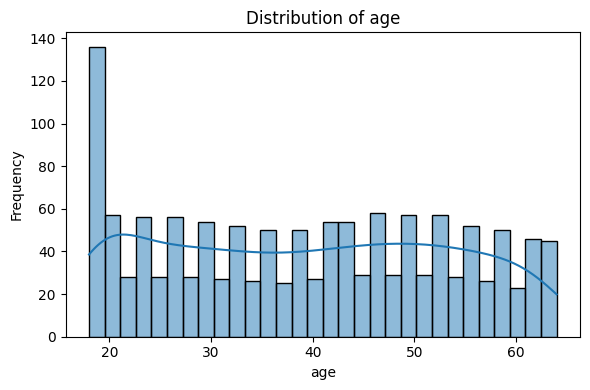

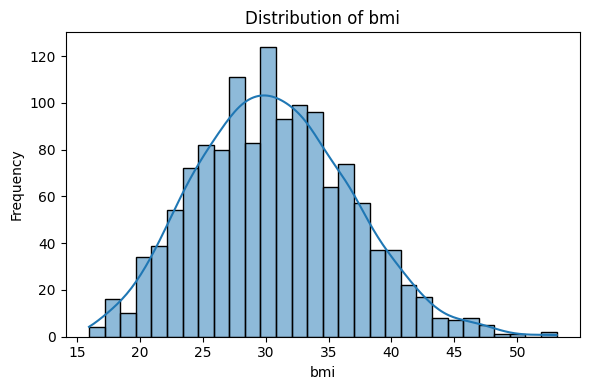

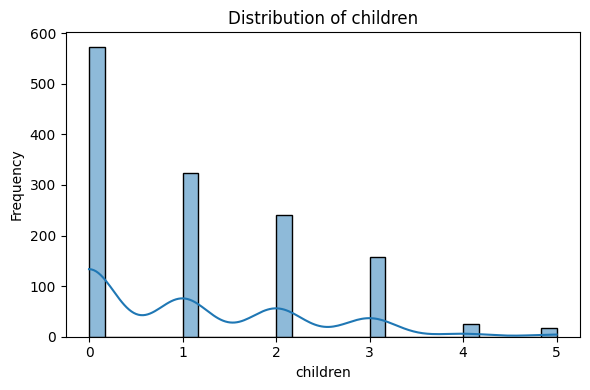

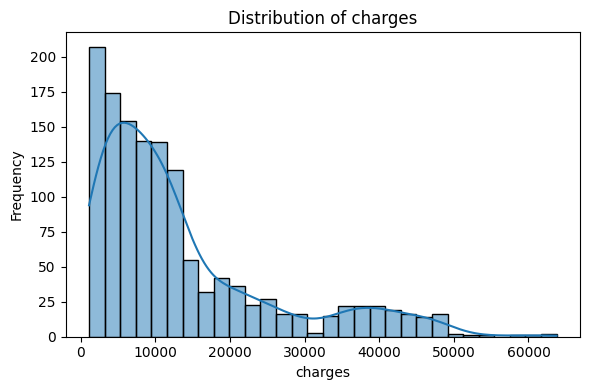

In [73]:
# Histograms for numeric features
numeric_cols = ['age', 'bmi', 'children', 'charges']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=mds1, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

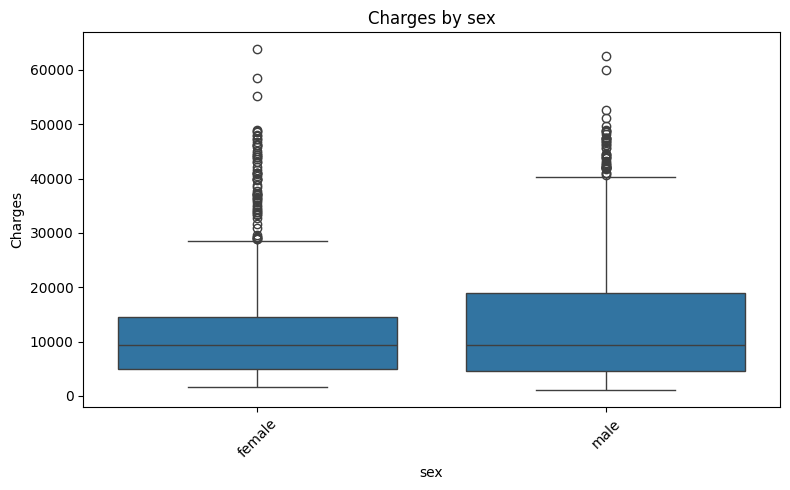

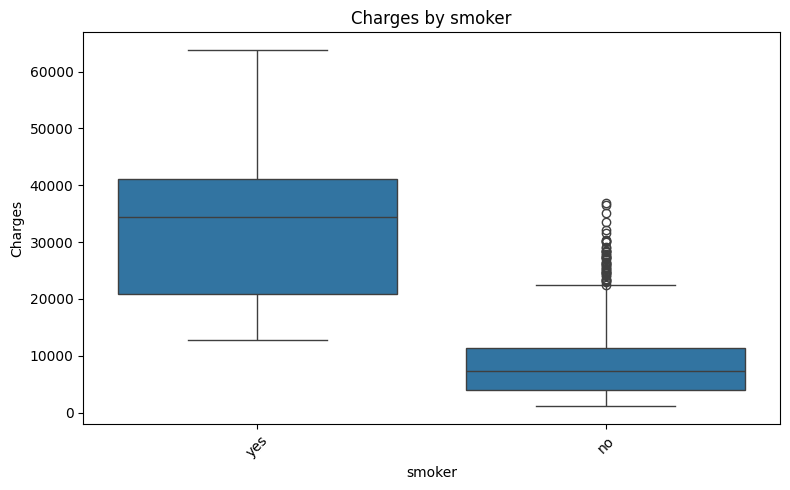

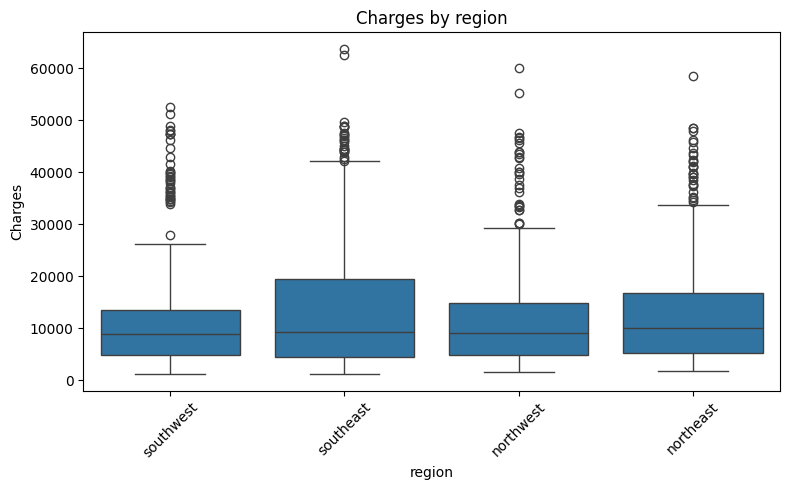

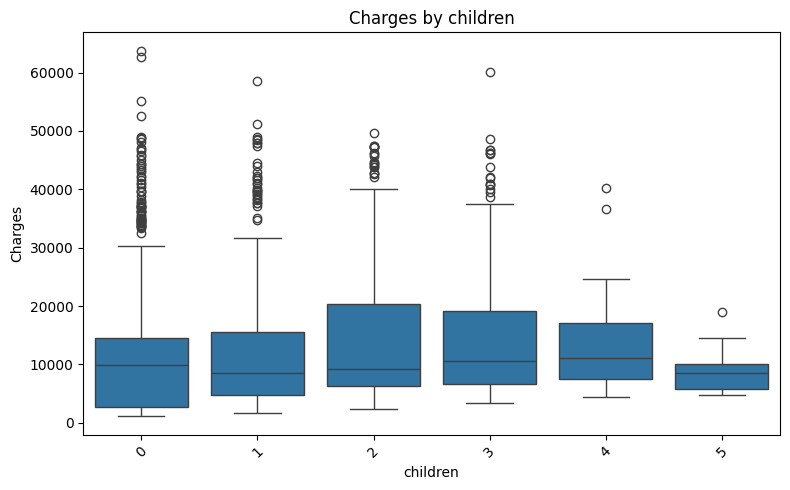

In [76]:
# Boxplots for categorical vs. charges
categorical_cols = ['sex', 'smoker', 'region', 'children']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=mds1, x=col, y='charges')
    plt.title(f'Charges by {col}')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

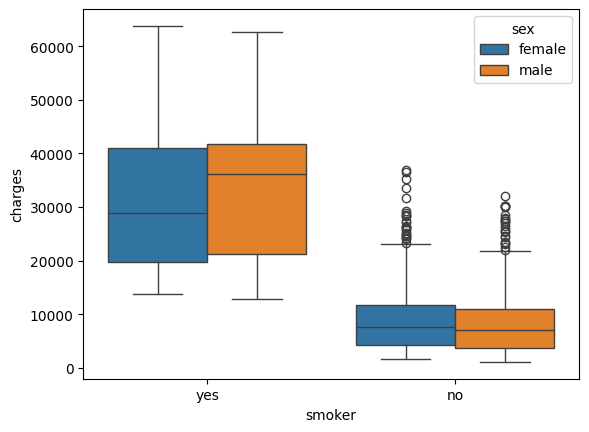

In [77]:
sns.boxplot(data=mds1, x='smoker', y='charges', hue='sex')


**2.2 Handle missing values and clean data**

There are no missing values in this data set so this step is not needed.
As mentioned in Section 1, sex, smoker, and region are all non-numeric and will be encoded in the next step for Regression Modeling.

**2.3 Feature selection and engineering**

In [79]:
mds1_encoded = pd.get_dummies(mds1, columns=['sex', 'smoker', 'region'], drop_first=True)
# Show encoded data
mds1_encoded.head()

,age,bmi,children,charges,charges_scaled,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.629546,False,True,False,False,True
1,18,33.770,1,1725.55230,-0.643134,True,False,False,True,False
2,28,33.000,3,4449.46200,-0.414453,True,False,False,True,False
3,33,22.705,0,21984.47061,1.057671,True,False,True,False,False
4,32,28.880,0,3866.85520,-0.463364,True,False,True,False,False


The medical charges range significantly (e.g., from around $1,725 to $21,984). Smoking is a major factor influencing medical charges in this dataset. Train the model to predict charges based on these features. Perform feature importance analysis to see which variables are driving the most variation in charges.


#### **Section 3: Feature Selection and Justification**

**3.1 Choose Features and Target**

- Predict insurance/medical costs the target variable is charges

**Below are the input features** 

- age - Medical costs tend to correlate with age
- bmi - Higher medical costs correlate with higher BMI
- smoker - Higher medical costs correlate with smokers
- children - Potentially family size or number of children could affect costs
- sex - Male vs female could affect costs

**3.2 Define X and y**

In [109]:

# Define features and target
X = mds1_encoded.drop(columns=['charges', 'charges_scaled'])  # Drop target and scaled charges
y = mds1_encoded['charges']  # Target variable: charges

#### **Section 4. Train a Model (Linear Regression)**

**4.1 Split the data into training and test sets using train_test_split.**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4.2 Train model using Scikit-Learn model.fit() method**

In [85]:
from sklearn.linear_model import LinearRegression

# Initialize the model and fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model summary or coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [  248.21072022   318.70144095   533.0099888   -101.54205399
 23077.76459287  -391.76145478  -838.91961573  -659.13975155]
Model intercept: -11092.652295945965


**4.3 Evalulate performance**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")


R² Score: 0.8069
Mean Absolute Error (MAE): $4177.05
Root Mean Squared Error (RMSE): $5956.34


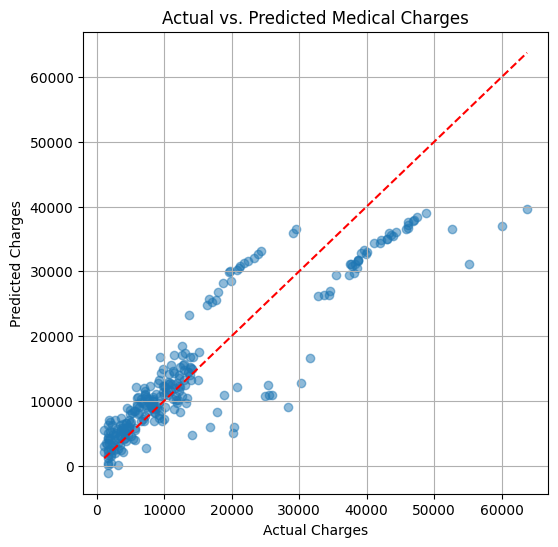

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Medical Charges')
plt.grid(True)
plt.show()

#### **Reflection 4. How well did the model perform? Any surprises in the results?**

- R² Score of 80.6% means that the model explains approximately 80.6% of the variance in medical charges, which indicates a strong fit

- Model explains about 80.7% of the variability in insurance charges based on the input features (like age, BMI, smoking status, etc.).  but there’s still ~19.3% of variation that's unexplained — possibly due to other factors not included in your model (e.g., pre-existing conditions, specific procedures, or insurance plans). The average error in predictions (MAE) was approximately $4,177, and the root mean squared error (RMSE), which penalizes large errors more, was around $5,956. This suggests that the model captures general trends but may underperform on extreme values such as high-risk patients.

#### **Section 5: Improve the Model or Try Alternates**

**5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.**

In [97]:
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train pipeline 1
pipeline1.fit(X_train, y_train)

# Predict with pipeline 1
y_pred1 = pipeline1.predict(X_test)

# Evaluate pipeline 1
r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))

# Print results for pipeline 1
print("Pipeline 1: Linear Regression")
print(f"R² Score: {r2_1:.4f}")
print(f"MAE: ${mae_1:.2f}")
print(f"RMSE: ${rmse_1:.2f}")

Pipeline 1: Linear Regression
R² Score: 0.8069
MAE: $4177.05
RMSE: $5956.34


####  **5.2 Pipeline 2: Imputer → Polynomial Features (deg=3) → StandardScaler → Linear Regression**

In [98]:
# Create pipeline 2
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train pipeline 2
pipeline2.fit(X_train, y_train)

# Predict with pipeline 2
y_pred2 = pipeline2.predict(X_test)

# Evaluate pipeline 2
r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

# Print results for pipeline 2
print("\nPipeline 2: Polynomial Regression (degree=3)")
print(f"R² Score: {r2_2:.4f}")
print(f"MAE: ${mae_2:.2f}")
print(f"RMSE: ${rmse_2:.2f}")


Pipeline 2: Polynomial Regression (degree=3)
R² Score: 0.8709
MAE: $3048.86
RMSE: $4870.27


#### **5.3 Compare performance of all models across the same performance metrics**
**Regression Pipeline Model Comparison**

In [108]:
import pandas as pd

# Set max column width so Notes are not chopped
pd.set_option('display.max_colwidth', None)

# Create DataFrame
data = {
    'Metric': ['R² Score', 'MAE', 'RMSE'],
    'Original Linear Regression': [0.7836, '$4,181.19', '$5,796.28'],
    'Standard Scaler Linear Regression': [0.7836, '$4,181.19', '$5,796.28'],
    'Polynomial Features (Degree=3)': [0.8486, '$2,937.92', '$4,847.50'],
    'Notes': [
        'Polynomial model explained more variance in charges',
        'Polynomial model was more accurate than the Standard Scaler Linear Regression model',
        'Polynomial model had a lower RMSE indicating that there were fewer large prediction errors'
    ]
}

df = pd.DataFrame(data)
df.set_index('Metric', inplace=True)

# Apply styling for word-wrap in Notes column
df.style.set_properties(subset=['Notes'], **{'white-space': 'pre-wrap',
    'text-align': 'left'})


,Original Linear Regression,Standard Scaler Linear Regression,Polynomial Features (Degree=3),Notes
Metric,,,,
R² Score,0.783600,0.783600,0.848600,Polynomial model explained more variance in charges
MAE,"$4,181.19","$4,181.19","$2,937.92",Polynomial model was more accurate than the Standard Scaler Linear Regression model
RMSE,"$5,796.28","$5,796.28","$4,847.50",Polynomial model had a lower RMSE indicating that there were fewer large prediction errors


#### **Reflection 5: Which models performed better? How does scaling impact results?**

Original Linear Regression vs. Pipeline 1 : These two are identical.  Original model likely already had clean data (e.g., no missing values, one-hot encoded). The steps in Pipeline 1 (imputer + scaler + linear regression) didn't change anything significantly — just organized the process better.


Based on the results provided, Pipeline 2: Polynomial Regression (degree=3) performed the best across all metrics. R² Score: Pipeline 2 explains 87.09% of the variance in medical charges, significantly better than the 80.69% explained by both the original linear regression model and Pipeline 1.

Mean Absolute Error (MAE): Pipeline 2 has an average error of $3048.86, much lower than the $4177.05 of the original and Pipeline 1 models. This means Pipeline 2 is consistently making smaller errors.

Root Mean Squared Error (RMSE): Similarly, Pipeline 2 has a lower RMSE ($4870.27) than both the original and Pipeline 1 models ($5956.34), meaning it performs better even on larger prediction mistakes.

#### **Section 6. Final Thoughts & Insights**

**6.1 Summarize findings.**

**Regression Pipeline Model Comparison**

Pipeline 2 (Polynomial Regression with degree=3) is the best-performing model because it explains more variance and has lower error metrics (MAE and RMSE). However, keep in mind that polynomial models are more prone to overfitting, especially with high-degree features, so validating with cross-validation or regularization would be ideal.



#### **6.2 Discuss Challenges Faced**

- I didn't run into nearly as many challenges from this dataset. This mgiht be due to this dataset not having any missing values so it was much easier to work with the data.
  
- The pipeline portion was a bit tricky at first, but ended up making sense as I worked through it. I didn't have any actual challenges generating the results from the different models, but figuring out how to set up the new models took a little bit.

#### **6.3 If you had more time, what would you try next?**

- I would add Ridge to my Standard Scaler Linear Regression model to see how the results would change. I am fairly certain that the results would change by adding Ridge to the model since adding the scaling changed some of the coefficient values behind the scenes.
  
- I would also maybe try models such as RandomForestRegressor and GradientBoostingRegressor to see what kind of results I get from those models compared to the ones I used. I've used RandomForest and GradientBoosting classified models before and I had success with both so I'd like to introduce those to regression modeling as well.
  
#### **Reflection 6. What did you learn from this project?**

- I learned how to use regression models to make predictions on a target variable and carefully selected input features. Additionally, I learned how to build pipelines to make my models cleaner and more efficient.
  
- Using piplines allowed me to incorporate different preprocessing steps into my model like scaling and polynomial features to see how it would affect performance.